In [137]:
# Importing packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [55]:
# lets import the dataset
data = pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [56]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)


In [57]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## Filter High-value customers

###  # High-value customers : Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [58]:
# To derive highvlue customer need to find total amount paid by each customer.
# Creating a new column total_rech_data_amt_x which can be calculated as av_rech_amt_data_x * total_rech_data_x . Where x is month 6,7,8,9

data['total_rech_data_amt_6'] = data['av_rech_amt_data_6'] * data['total_rech_data_6']
data['total_rech_data_amt_7'] = data['av_rech_amt_data_7'] * data['total_rech_data_7']
data['total_rech_data_amt_8'] = data['av_rech_amt_data_8'] * data['total_rech_data_8']
data['total_rech_data_amt_9'] = data['av_rech_amt_data_9'] * data['total_rech_data_9']

In [59]:
# dropping av_rech_amt_data_x  and  total_rech_data_x

data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)


In [60]:
# lets find out the average recharge done in the first two months(june & july) - the good phase
# total amount spend would be the sum of total_rech_data_amt_X and total_rech_amt_X for 6 & &.

data_temp = (data['total_rech_amt_6'].fillna(0) 
+ data['total_rech_amt_7'].fillna(0)
+ data['total_rech_data_amt_6'].fillna(0)
+ data['total_rech_data_amt_7'].fillna(0))/2


In [61]:
# take 70 percentile of the calculated average amount
data70= np.percentile(data_temp, 70.0)
print("70 percentile is : ",data70 )

70 percentile is :  478.0


In [62]:
# fitler the given data set based on 70th percentile hign value customer 
data_hvc = data[data_temp >= data70]

print("Dimensions of the filtered dataset:",data_hvc.shape)

Dimensions of the filtered dataset: (30001, 222)


## Mark Churn/Non Churn

In [63]:
# lets introduce a new column "churn", values would be either 1 (churn) or 0 (non-churn)
# we will calculate churn/non-churn based on the usage as mentioned in the problem statement
data_hvc['churn'] = np.where(data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
data_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014

In [64]:
# lets find out churn/non churn percentage   tofind data imbalance
data_hvc['churn'].value_counts()/len(data_hvc)*100


0    91.863605
1     8.136395
Name: churn, dtype: float64

###  Observation: ~92% is non churn and only 8% is churn . This is case of data imbalance that has to be dealt with

In [65]:
# lets check the unique value columns and drop them as they are give us no additional info or insight into the data
for i in data_hvc.columns:
    if data_hvc[i].nunique() == 1:

        data_hvc.drop(i,axis=1,inplace = True)

print("Dimension of the updated dataset:",data_hvc.shape)

Dimension of the updated dataset: (30001, 207)


In [66]:
# lets check the null values present in the dataset
(data_hvc.isnull().sum() * 100 / len(data_hvc)).sort_values(ascending = False)

arpu_3g_9                   49.268358
fb_user_9                   49.268358
date_of_last_rech_data_9    49.268358
max_rech_data_9             49.268358
count_rech_2g_9             49.268358
count_rech_3g_9             49.268358
arpu_2g_9                   49.268358
night_pck_user_9            49.268358
total_rech_data_amt_9       49.268358
date_of_last_rech_data_8    46.825106
fb_user_8                   46.825106
night_pck_user_8            46.825106
arpu_3g_8                   46.825106
count_rech_3g_8             46.825106
max_rech_data_8             46.825106
arpu_2g_8                   46.825106
total_rech_data_amt_8       46.825106
count_rech_2g_8             46.825106
count_rech_2g_6             44.148528
max_rech_data_6             44.148528
date_of_last_rech_data_6    44.148528
arpu_3g_6                   44.148528
fb_user_6                   44.148528
total_rech_data_amt_6       44.148528
night_pck_user_6            44.148528
arpu_2g_6                   44.148528
count_rech_3

In [67]:
# Drop Columns with > 40% of missing values except 9th Month's columns
cols = data_hvc.columns
data_hvc_na= data_hvc.isnull().sum() * 100 / len(data_hvc)
data_hvc_na_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': data_hvc_na})

cols_to_drop = data_hvc_na_df.loc[(data_hvc_na_df["col_name"].str.contains('_9')==False) & (data_hvc_na_df["perc_null"] > 40.0)]["col_name"]
cols_to_drop

date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6                    night_pck_

In [68]:
# lets drop these columns
data_hvc.drop(cols_to_drop, axis=1,inplace = True)
data_hvc.shape

(30001, 180)

In [69]:
# lets check for columns that can be changed to integers, floats or date types
cols_types = data_hvc.select_dtypes(include=['object'])
print(cols_types.iloc[0])
# convert to datetime
for col in cols_types.columns:
    data_hvc[col] = pd.to_datetime(data_hvc[col])

data_hvc.shape

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


(30001, 180)

In [70]:
# lets check the correlation amongst the features, drop the highly correlated ones
cor = data_hvc.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()


In [71]:
cor[(cor > 0.60) | (cor < -0.60)]

arpu_7                 arpu_6              0.671732
arpu_8                 arpu_6              0.612617
                       arpu_7              0.759858
arpu_9                 arpu_7              0.683613
                       arpu_8              0.797102
onnet_mou_7            onnet_mou_6         0.762120
onnet_mou_8            onnet_mou_6         0.643175
                       onnet_mou_7         0.810231
onnet_mou_9            onnet_mou_7         0.686210
                       onnet_mou_8         0.813435
offnet_mou_7           offnet_mou_6        0.745765
offnet_mou_8           offnet_mou_6        0.604877
                       offnet_mou_7        0.771708
offnet_mou_9           offnet_mou_7        0.666765
                       offnet_mou_8        0.791570
roam_ic_mou_8          roam_ic_mou_7       0.611479
roam_og_mou_6          roam_ic_mou_6       0.645600
roam_og_mou_8          roam_og_mou_7       0.604862
roam_og_mou_9          roam_og_mou_8       0.650164
loc_og_t2t_m

In [72]:
# we will drop the columns with high correlation (+/- 60%)
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

data_hvc.drop(drop_col_list, axis=1, inplace=True)
data_hvc.shape

(30001, 125)

In [73]:
#Lets address rest of the null values

(data_hvc.isnull().sum() * 100 / len(data_hvc)).sort_values(ascending = False)

arpu_3g_9                   49.268358
total_rech_data_amt_9       49.268358
max_rech_data_9             49.268358
date_of_last_rech_data_9    49.268358
night_pck_user_9            49.268358
fb_user_9                   49.268358
std_og_t2f_mou_9             6.336455
og_others_9                  6.336455
std_ic_mou_9                 6.336455
loc_og_mou_9                 6.336455
std_ic_t2f_mou_9             6.336455
isd_og_mou_9                 6.336455
std_og_mou_9                 6.336455
std_ic_t2t_mou_9             6.336455
roam_og_mou_9                6.336455
loc_ic_mou_9                 6.336455
spl_og_mou_9                 6.336455
spl_ic_mou_9                 6.336455
loc_og_t2c_mou_9             6.336455
roam_ic_mou_9                6.336455
onnet_mou_9                  6.336455
ic_others_9                  6.336455
isd_ic_mou_9                 6.336455
offnet_mou_9                 6.336455
roam_og_mou_8                3.913203
std_og_mou_8                 3.913203
loc_ic_mou_8

In [76]:
# find col with any any null values left except for  month 9
cols = data_hvc.columns
data_temp= data_hvc.isnull().sum() * 100 / len(data_hvc)
data_hvc_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': data_temp})

col_null = data_hvc_null_df.loc[(data_hvc_null_df["col_name"].str.contains('_9')==False) & (data_hvc_null_df["perc_null"] > 0)]["col_name"]


onnet_mou_6              onnet_mou_6
onnet_mou_7              onnet_mou_7
onnet_mou_8              onnet_mou_8
offnet_mou_6            offnet_mou_6
offnet_mou_7            offnet_mou_7
offnet_mou_8            offnet_mou_8
roam_ic_mou_6          roam_ic_mou_6
roam_ic_mou_7          roam_ic_mou_7
roam_ic_mou_8          roam_ic_mou_8
roam_og_mou_6          roam_og_mou_6
roam_og_mou_7          roam_og_mou_7
roam_og_mou_8          roam_og_mou_8
loc_og_t2c_mou_6    loc_og_t2c_mou_6
loc_og_t2c_mou_7    loc_og_t2c_mou_7
loc_og_t2c_mou_8    loc_og_t2c_mou_8
loc_og_mou_6            loc_og_mou_6
loc_og_mou_7            loc_og_mou_7
loc_og_mou_8            loc_og_mou_8
std_og_t2f_mou_6    std_og_t2f_mou_6
std_og_t2f_mou_7    std_og_t2f_mou_7
std_og_t2f_mou_8    std_og_t2f_mou_8
std_og_mou_6            std_og_mou_6
std_og_mou_7            std_og_mou_7
std_og_mou_8            std_og_mou_8
isd_og_mou_6            isd_og_mou_6
isd_og_mou_7            isd_og_mou_7
isd_og_mou_8            isd_og_mou_8
s

In [78]:
# Removing all rows with null values except for last month(9)
for i in col_null:
    data_hvc = data_hvc[~np.isnan(data_hvc[i])]

In [79]:
data_hvc.shape

(28504, 125)

In [81]:
# Checking null values again
(data_hvc.isnull().sum() * 100 / len(data_hvc)).sort_values(ascending = False)

date_of_last_rech_data_9    48.309009
total_rech_data_amt_9       48.309009
max_rech_data_9             48.309009
night_pck_user_9            48.309009
fb_user_9                   48.309009
arpu_3g_9                   48.309009
std_og_mou_9                 3.069745
og_others_9                  3.069745
loc_og_t2c_mou_9             3.069745
loc_ic_mou_9                 3.069745
std_og_t2f_mou_9             3.069745
roam_og_mou_9                3.069745
std_ic_t2t_mou_9             3.069745
spl_ic_mou_9                 3.069745
roam_ic_mou_9                3.069745
ic_others_9                  3.069745
loc_og_mou_9                 3.069745
std_ic_t2f_mou_9             3.069745
offnet_mou_9                 3.069745
onnet_mou_9                  3.069745
spl_og_mou_9                 3.069745
std_ic_mou_9                 3.069745
isd_ic_mou_9                 3.069745
isd_og_mou_9                 3.069745
date_of_last_rech_9          1.659416
last_day_rch_amt_6           0.000000
last_day_rch

## Reduce the No of Columns by Creating New Meaningful Features
#### Create Columns with Average of 6th & 7th Month Since it's a "Good" Phase and Keep the 8th month untouched as it's "Action" Phase, for now to see if it can give any additional insight

In [88]:
col_list = data_hvc.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2f_mou', 'std_og_mou',
       'isd_og_mou', 'spl_og_mou', 'og_others', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2f_mou', 'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'max_rech_amt', 'last_day_rch_amt', 'vol_2g_mb',
       'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g'],
      dtype='object')

In [90]:
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    data_hvc[avg_col_name] = (data_hvc[col_6]  + data_hvc[col_7])/ 2

In [92]:
data_hvc.shape

(28504, 152)

In [94]:
#Drop the combined column

col_to_drop = data_hvc.filter(regex='_6|_7').columns
data_hvc.drop(col_to_drop, axis=1, inplace=True)

In [95]:
data_hvc.shape

(28504, 98)

In [96]:
# AON   is no of days user is using this network .lets now conevrt AON in months by dividing it by 30
data_hvc['aon_mon'] = data_hvc['aon']/30
# drop the AON col now
data_hvc.drop('aon', axis=1, inplace=True)
data_hvc['aon_mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Tenure Graph')

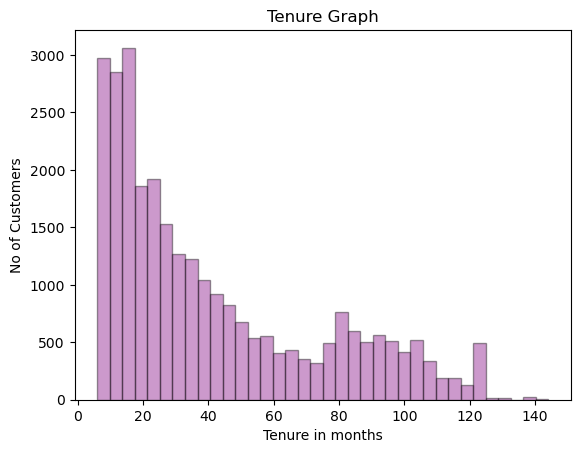

In [97]:
# Plotting the distribution of tenure
ax = sns.distplot(data_hvc['aon_mon'], hist=True, kde=False,
             bins=int(180/5), color = 'purple',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')

## Binning the tenure column 

In [98]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_hvc['tenure_range'] = pd.cut(data_hvc['aon_mon'], tn_range, labels=tn_label)
data_hvc['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

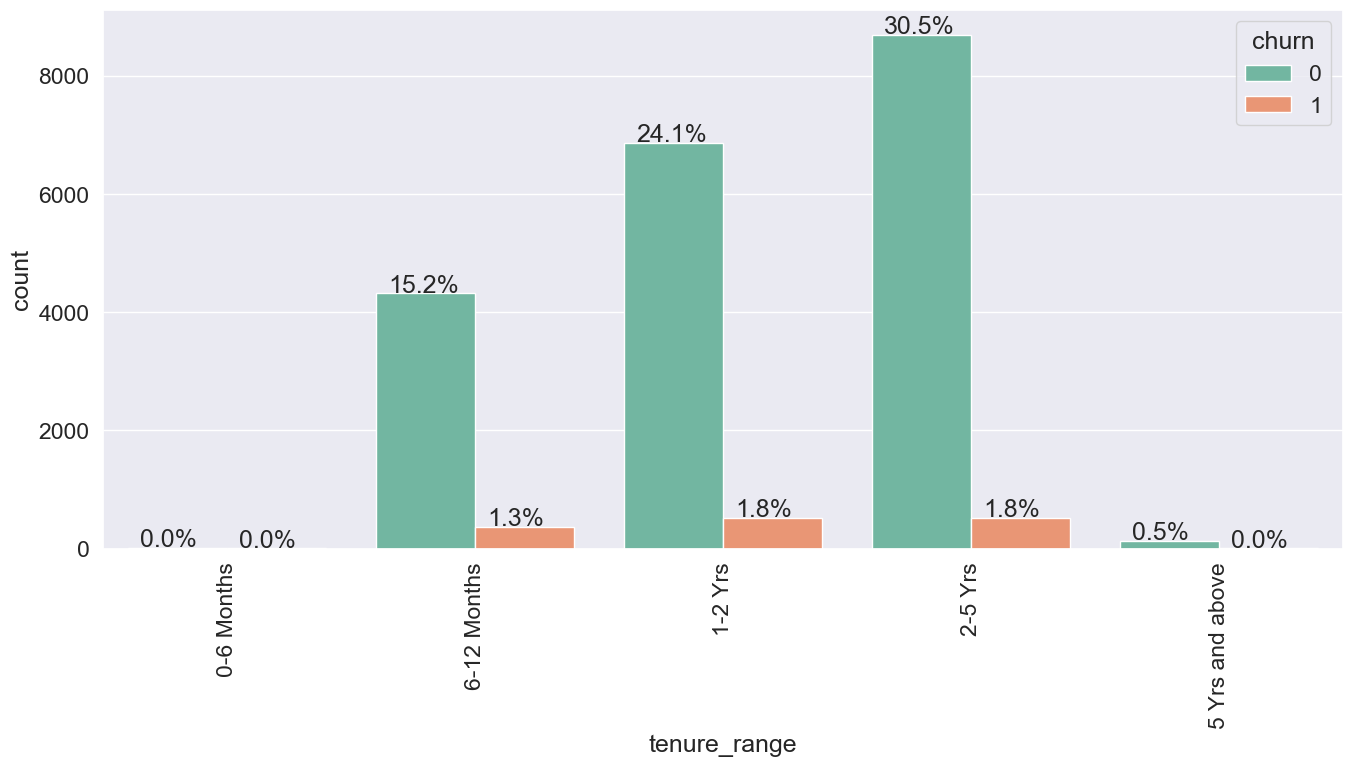

In [121]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(data_hvc['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(data_hvc.index))
ax = sns.countplot(x="tenure_range", data=data_hvc, palette="Set2", hue = "churn");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data_hvc))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

<Axes: >

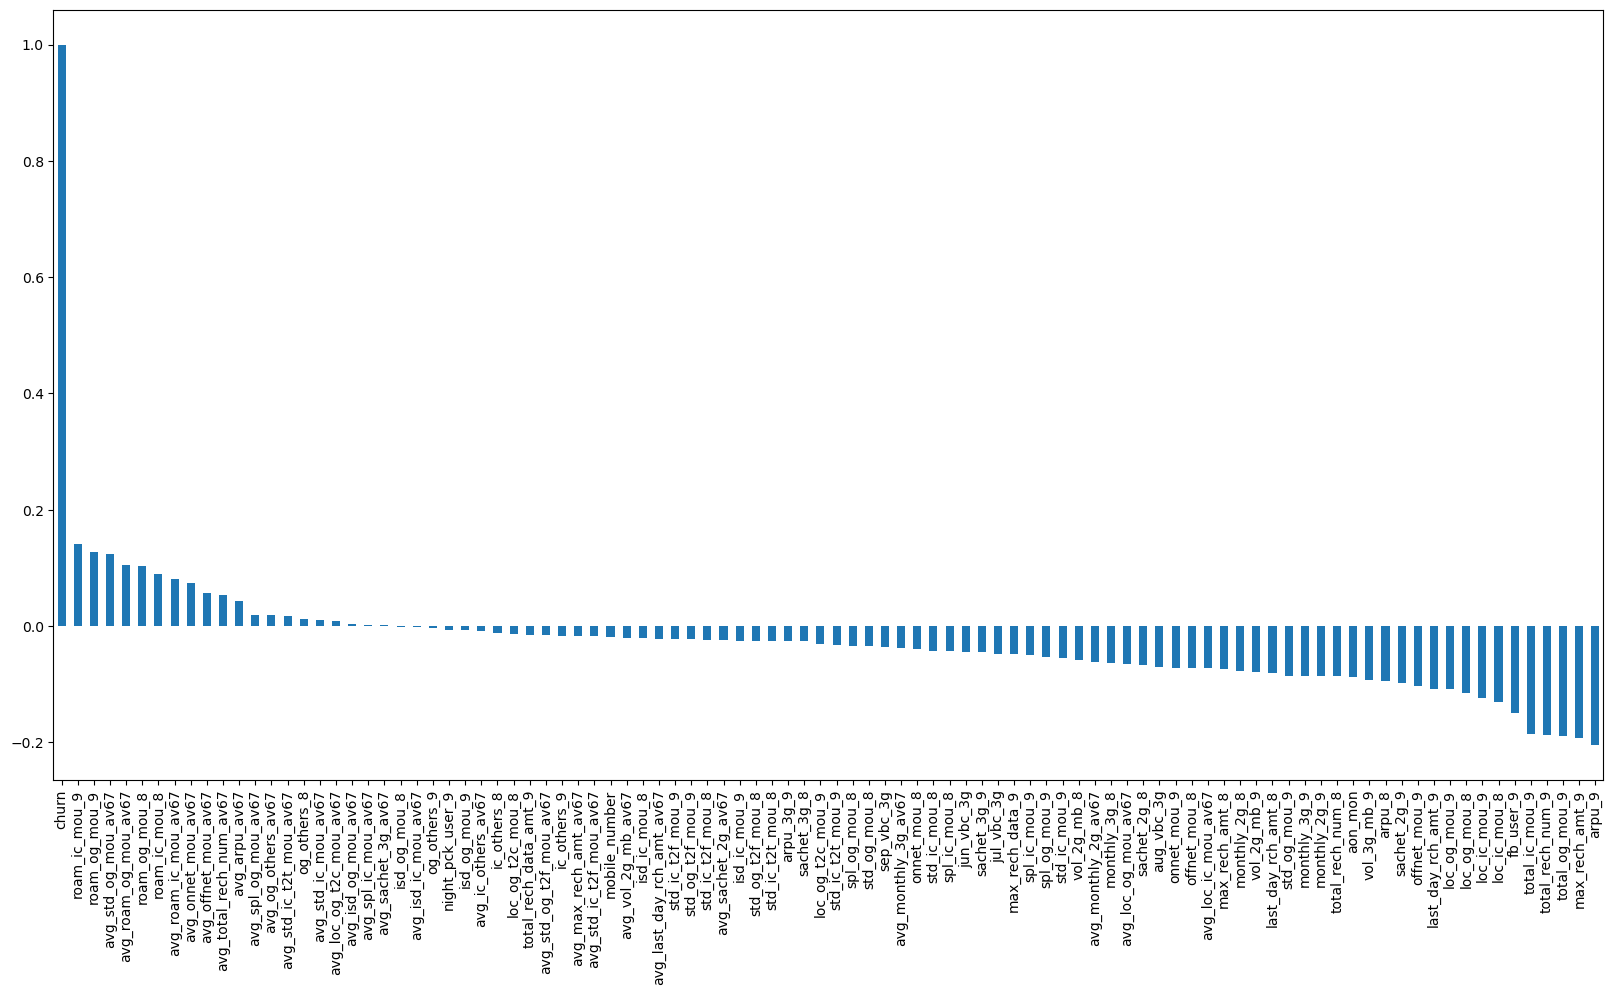

In [99]:
# lets check correlation of churn with other columns
plt.figure(figsize=(20,10))
data_hvc.corr()['churn'].sort_values(ascending = False).plot(kind='bar')



In [101]:
data_hvc.corr()['churn'].sort_values(ascending = False)

churn                        1.000000
roam_ic_mou_9                0.140360
roam_og_mou_9                0.127507
avg_std_og_mou_av67          0.123004
avg_roam_og_mou_av67         0.104642
roam_og_mou_8                0.102408
roam_ic_mou_8                0.088961
avg_roam_ic_mou_av67         0.081381
avg_onnet_mou_av67           0.073278
avg_offnet_mou_av67          0.057073
avg_total_rech_num_av67      0.053723
avg_arpu_av67                0.043317
avg_spl_og_mou_av67          0.019603
avg_og_others_av67           0.018535
avg_std_ic_t2t_mou_av67      0.017262
og_others_8                  0.011445
avg_std_ic_mou_av67          0.010681
avg_loc_og_t2c_mou_av67      0.008784
avg_isd_og_mou_av67          0.003846
avg_spl_ic_mou_av67          0.002394
avg_sachet_3g_av67           0.001119
isd_og_mou_8                -0.001693
avg_isd_ic_mou_av67         -0.002585
og_others_9                 -0.002763
night_pck_user_9            -0.007163
isd_og_mou_9                -0.007795
avg_ic_other

###  Observations :
#### 1. Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
#### 2. Avg Revenue per user, No. Of Recharge for 8th month has negative correlation with churn.

<Axes: xlabel='aon_mon', ylabel='avg_arpu_av67'>

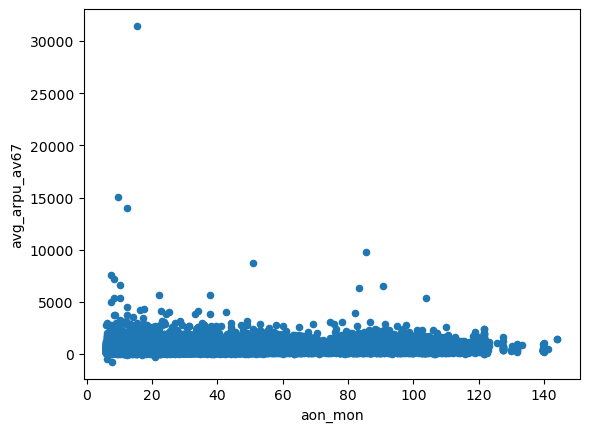

In [102]:
data_hvc[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',
                                                              y='avg_arpu_av67')

## Churn Vs other important features

Text(0.5, 1.0, 'Churn Vs Base Cost')

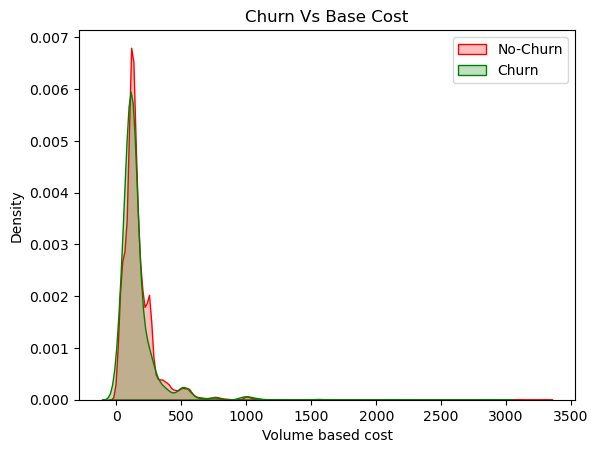

In [104]:
# churn Vs Base Cost
ax = sns.kdeplot(data_hvc.avg_max_rech_amt_av67[(data_hvc["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_hvc.avg_max_rech_amt_av67[(data_hvc["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

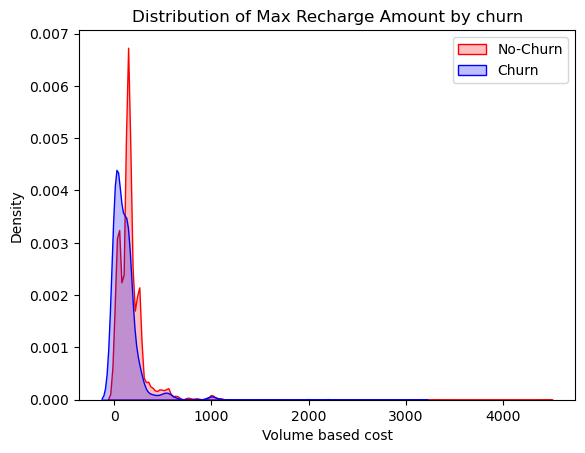

In [105]:
# churn vs max rechare amount
ax = sns.kdeplot(data_hvc.max_rech_amt_8[(data_hvc["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_hvc.max_rech_amt_8[(data_hvc["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

<Axes: xlabel='churn', ylabel='aon_mon'>

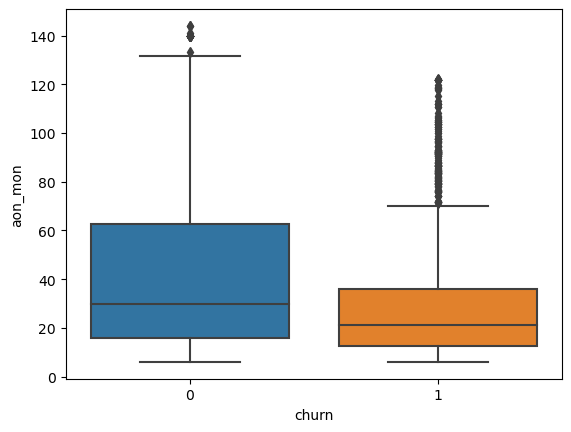

In [107]:
sns.boxplot(x = data_hvc.churn, y = data_hvc.aon_mon)

### Observation : The  tenured customers do no churn and they keep availing telecom services

In [110]:
#Remove All 9th Month related columns
drop_cols = [col for col in data_hvc.columns if '_9' in col]
print(drop_cols)

data_hvc.drop(drop_cols, axis=1, inplace=True)

data_hvc.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']


(28504, 62)

Text(0.5, 1.0, 'Churn Distribution')

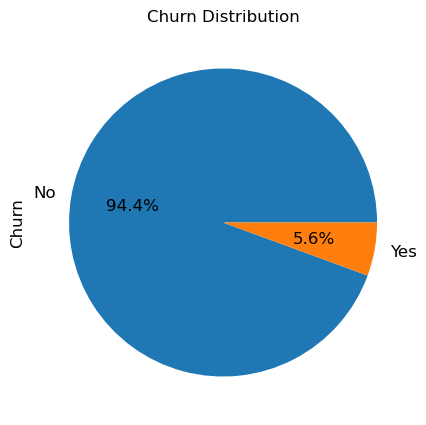

In [111]:
ax = (data_hvc['churn'].value_counts()*100.0 /len(data_hvc)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

In [112]:
# function to create Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [114]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

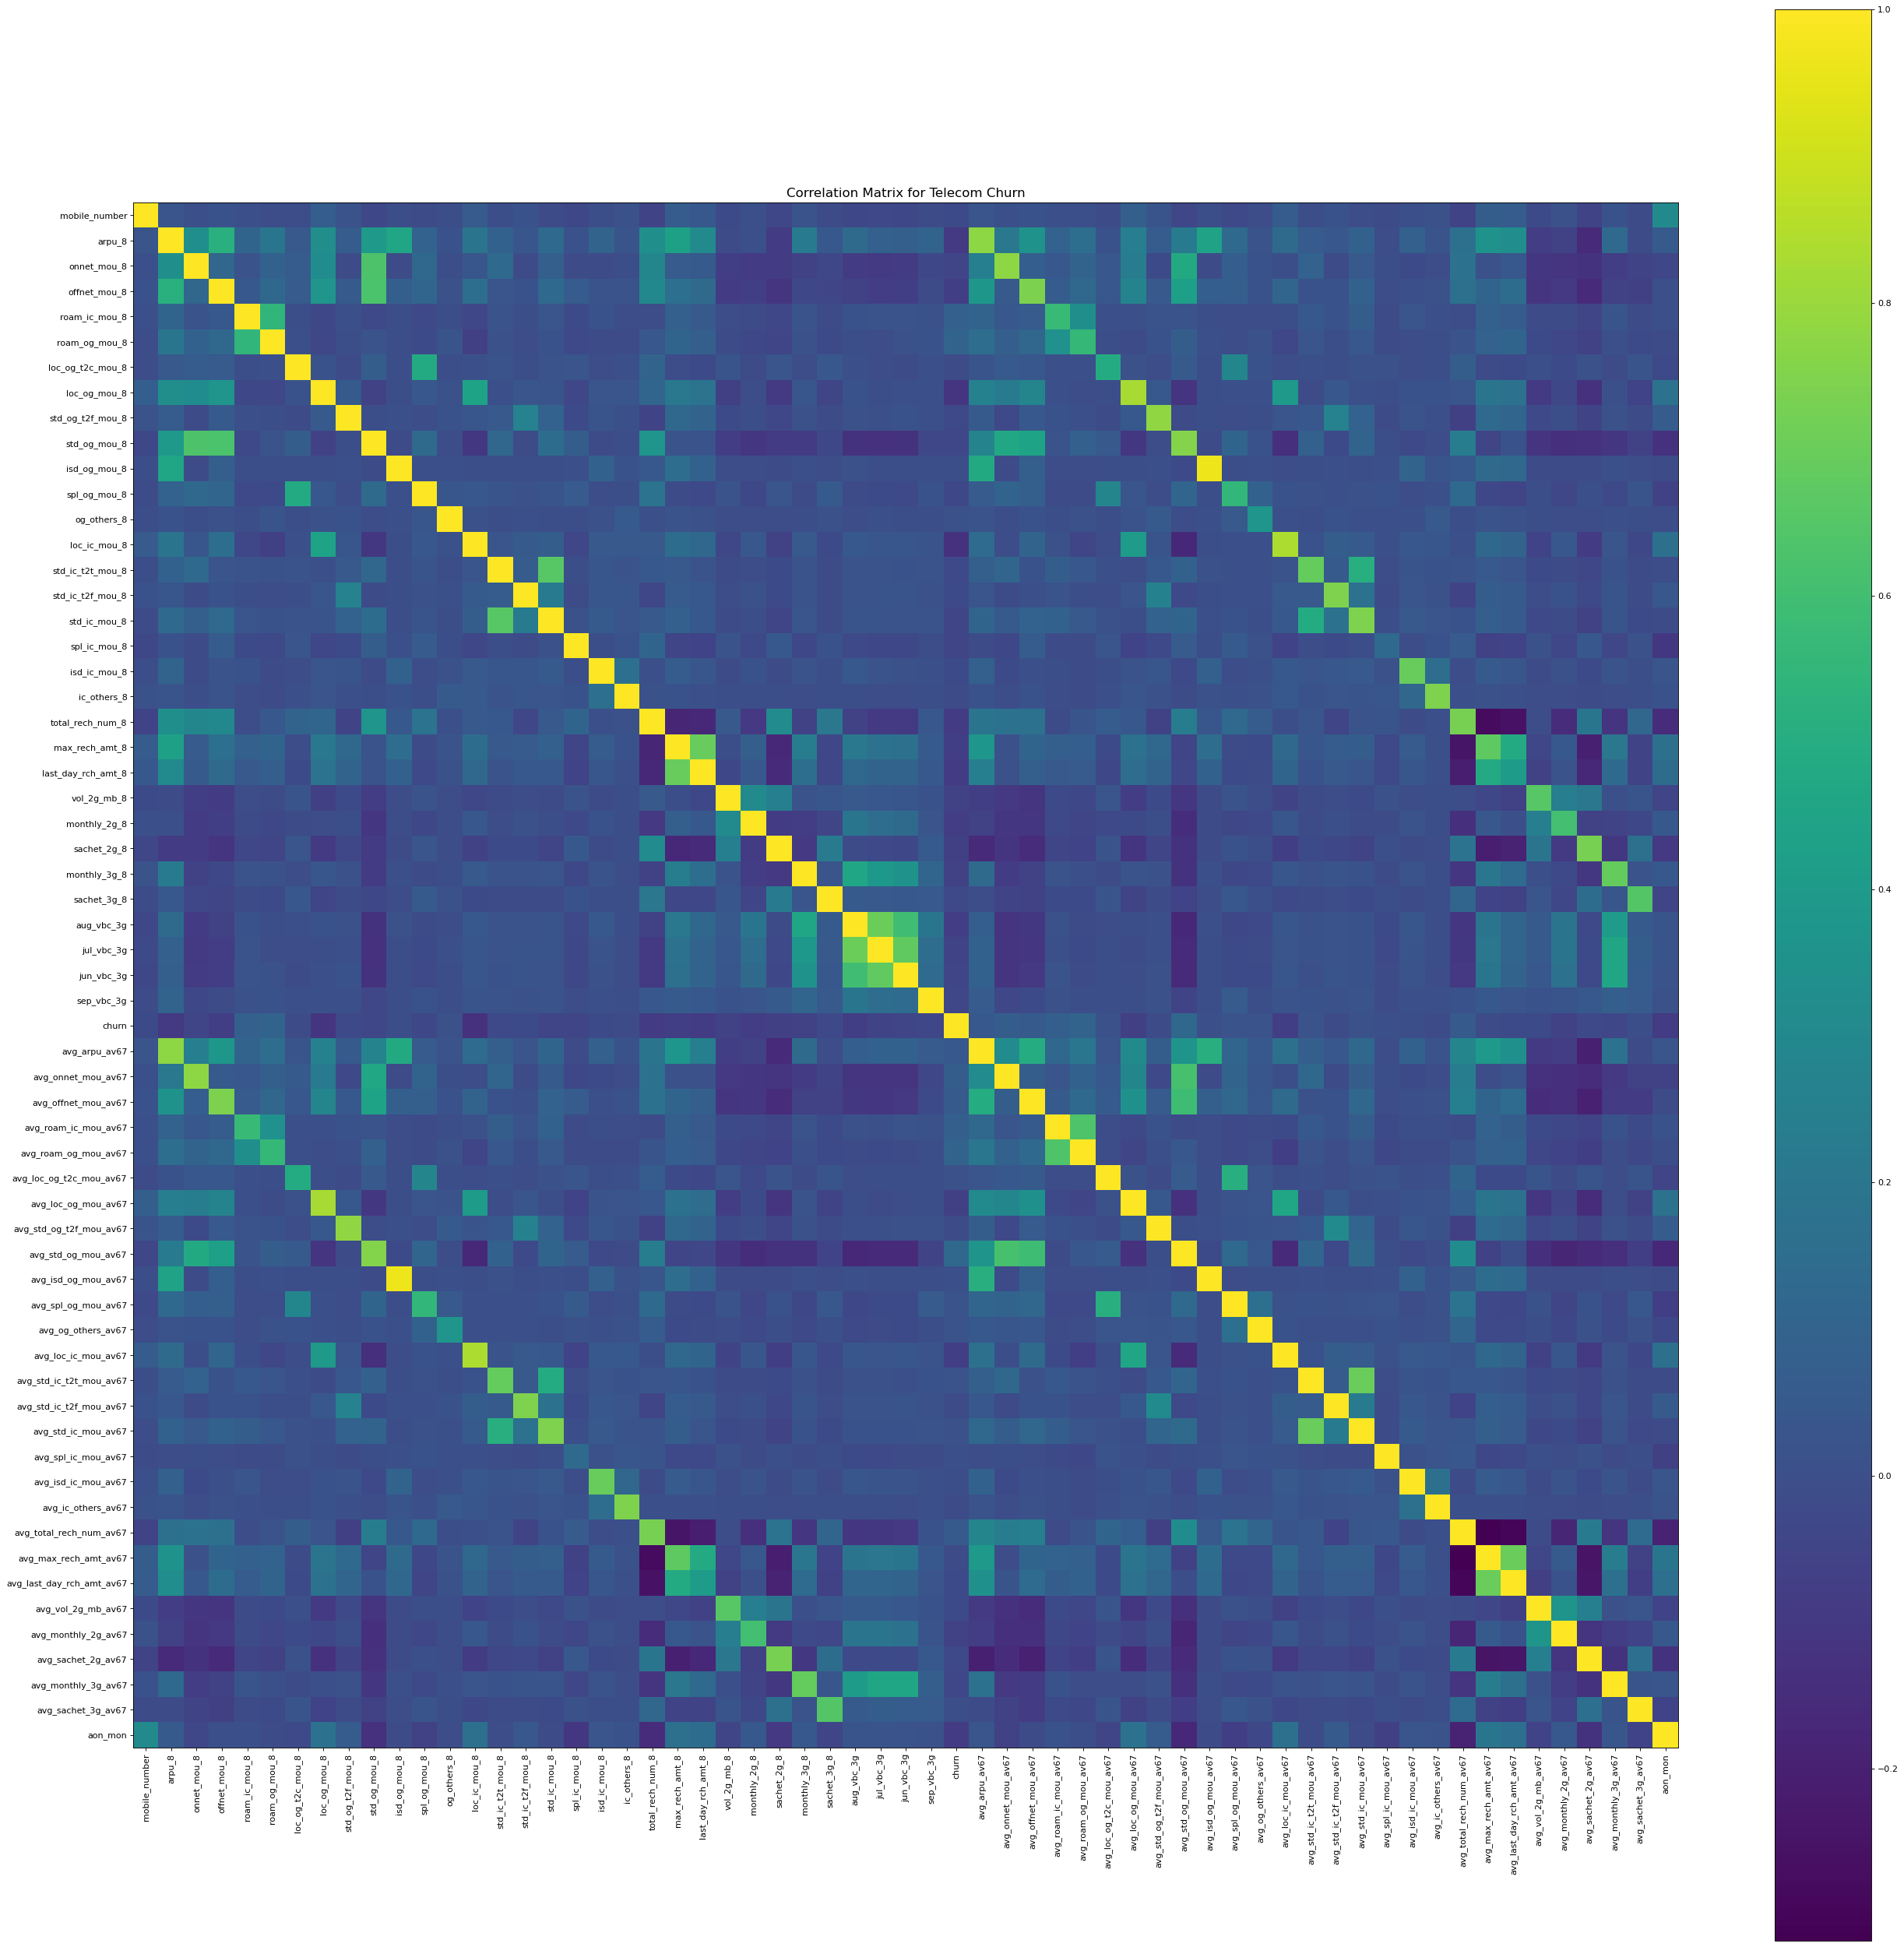

In [118]:
plotCorrelationMatrix(data_hvc, 40)

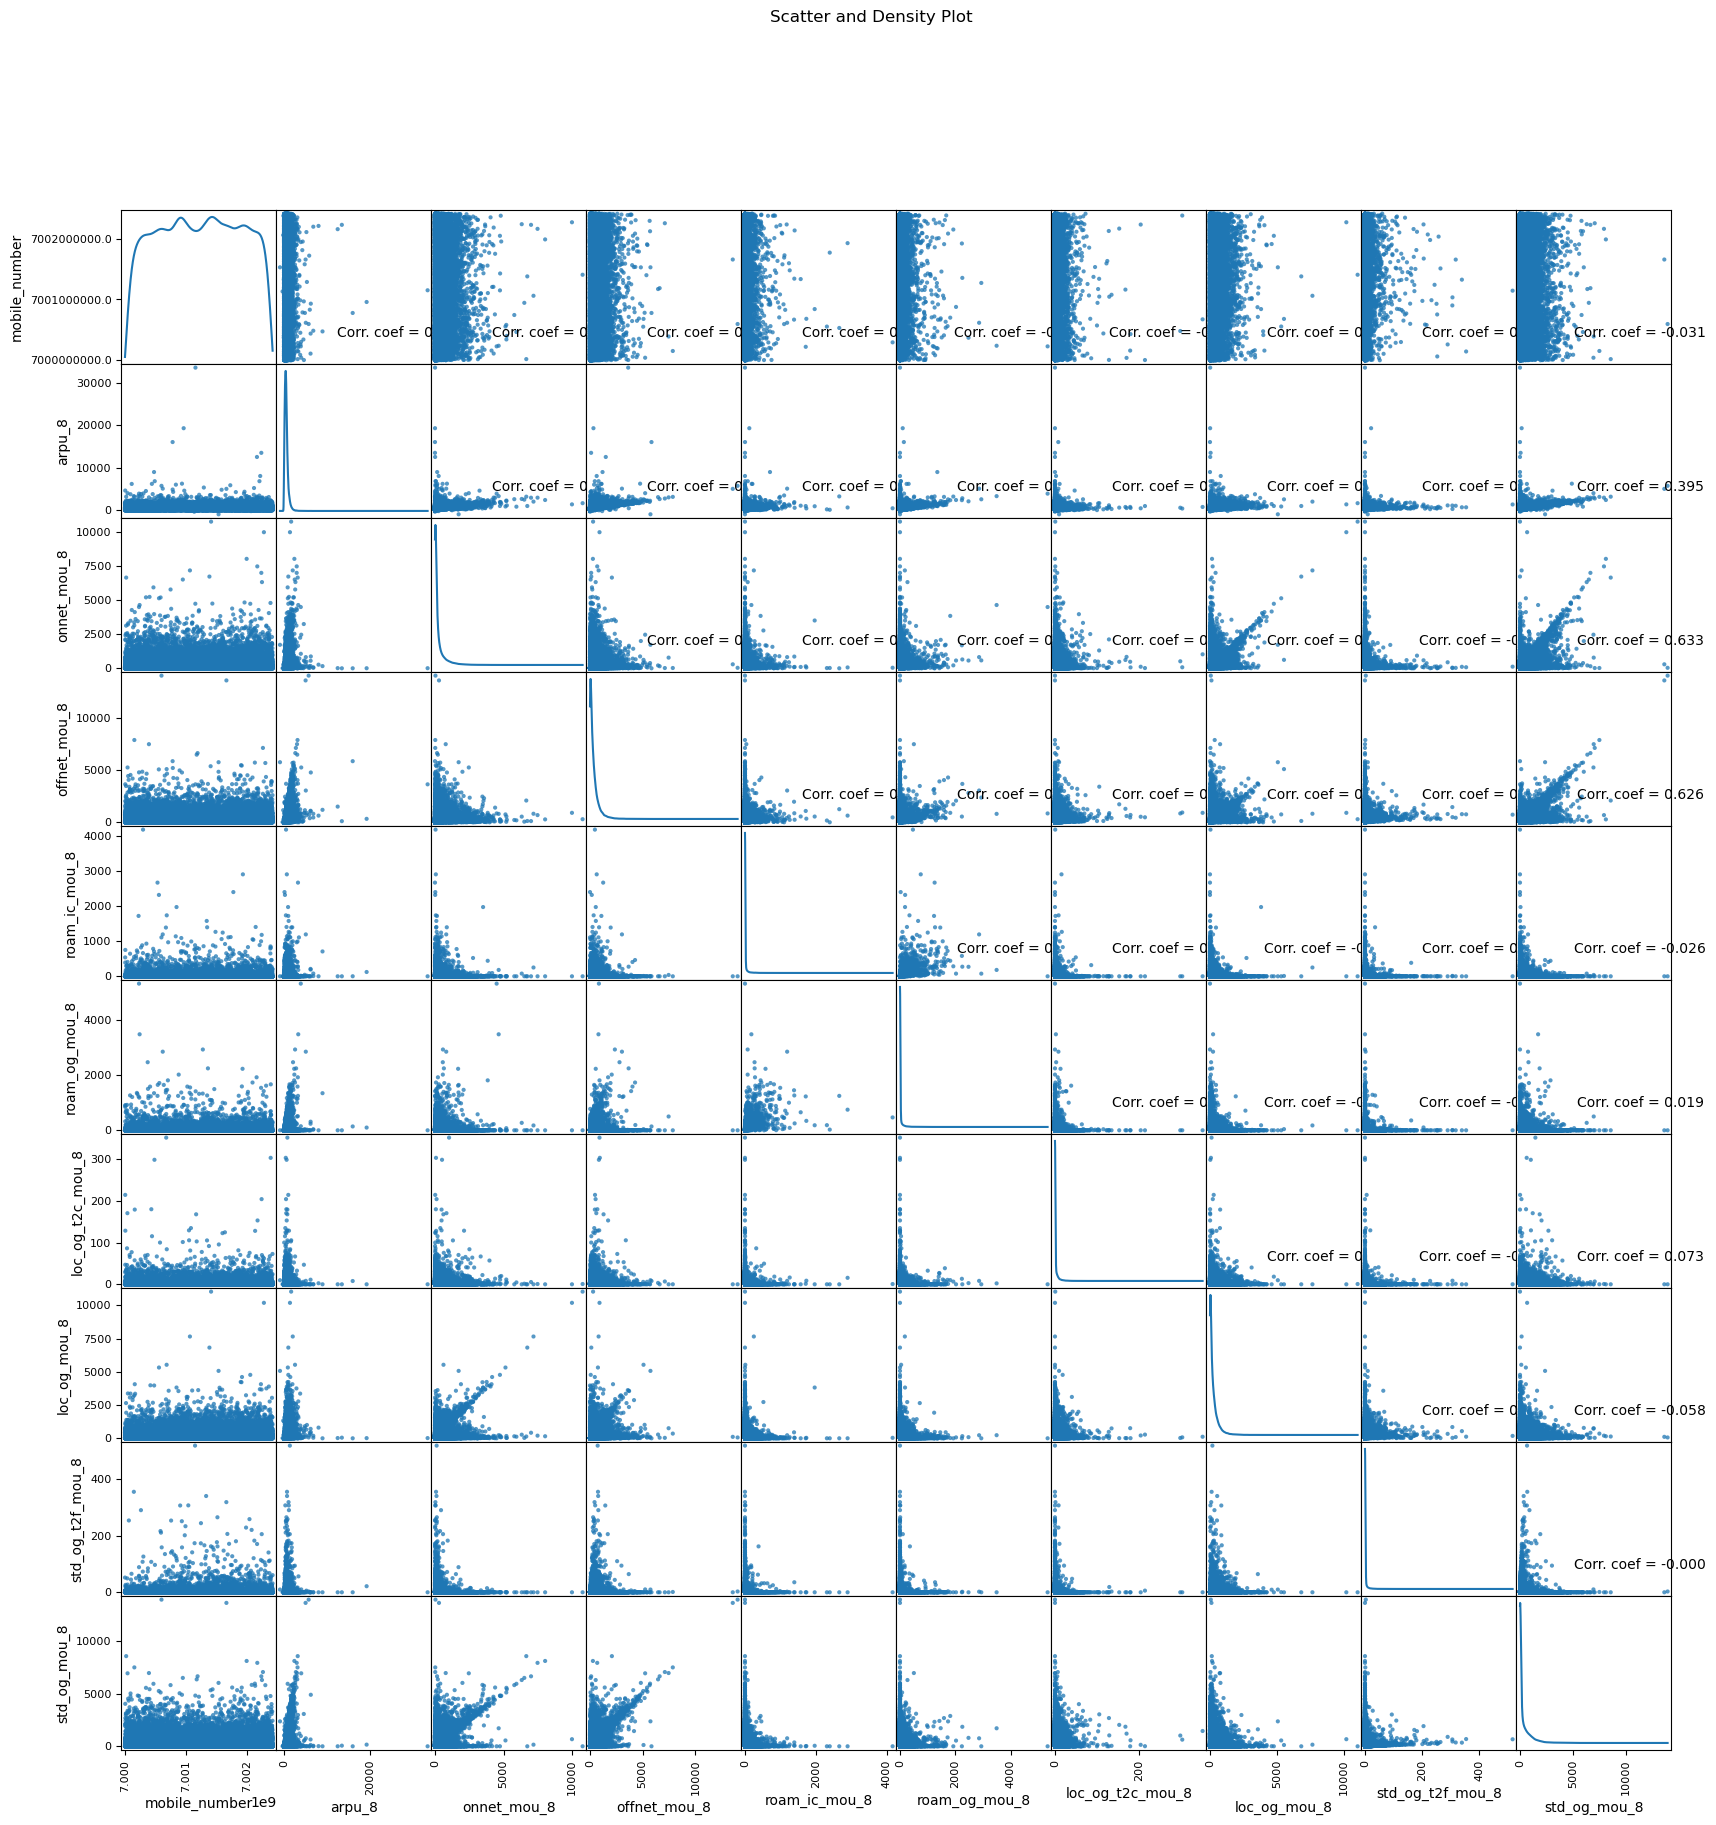

In [117]:
#Pair plot matrix of high value customer dataset
plotScatterMatrix(data_hvc, 20, 10)

<Axes: >

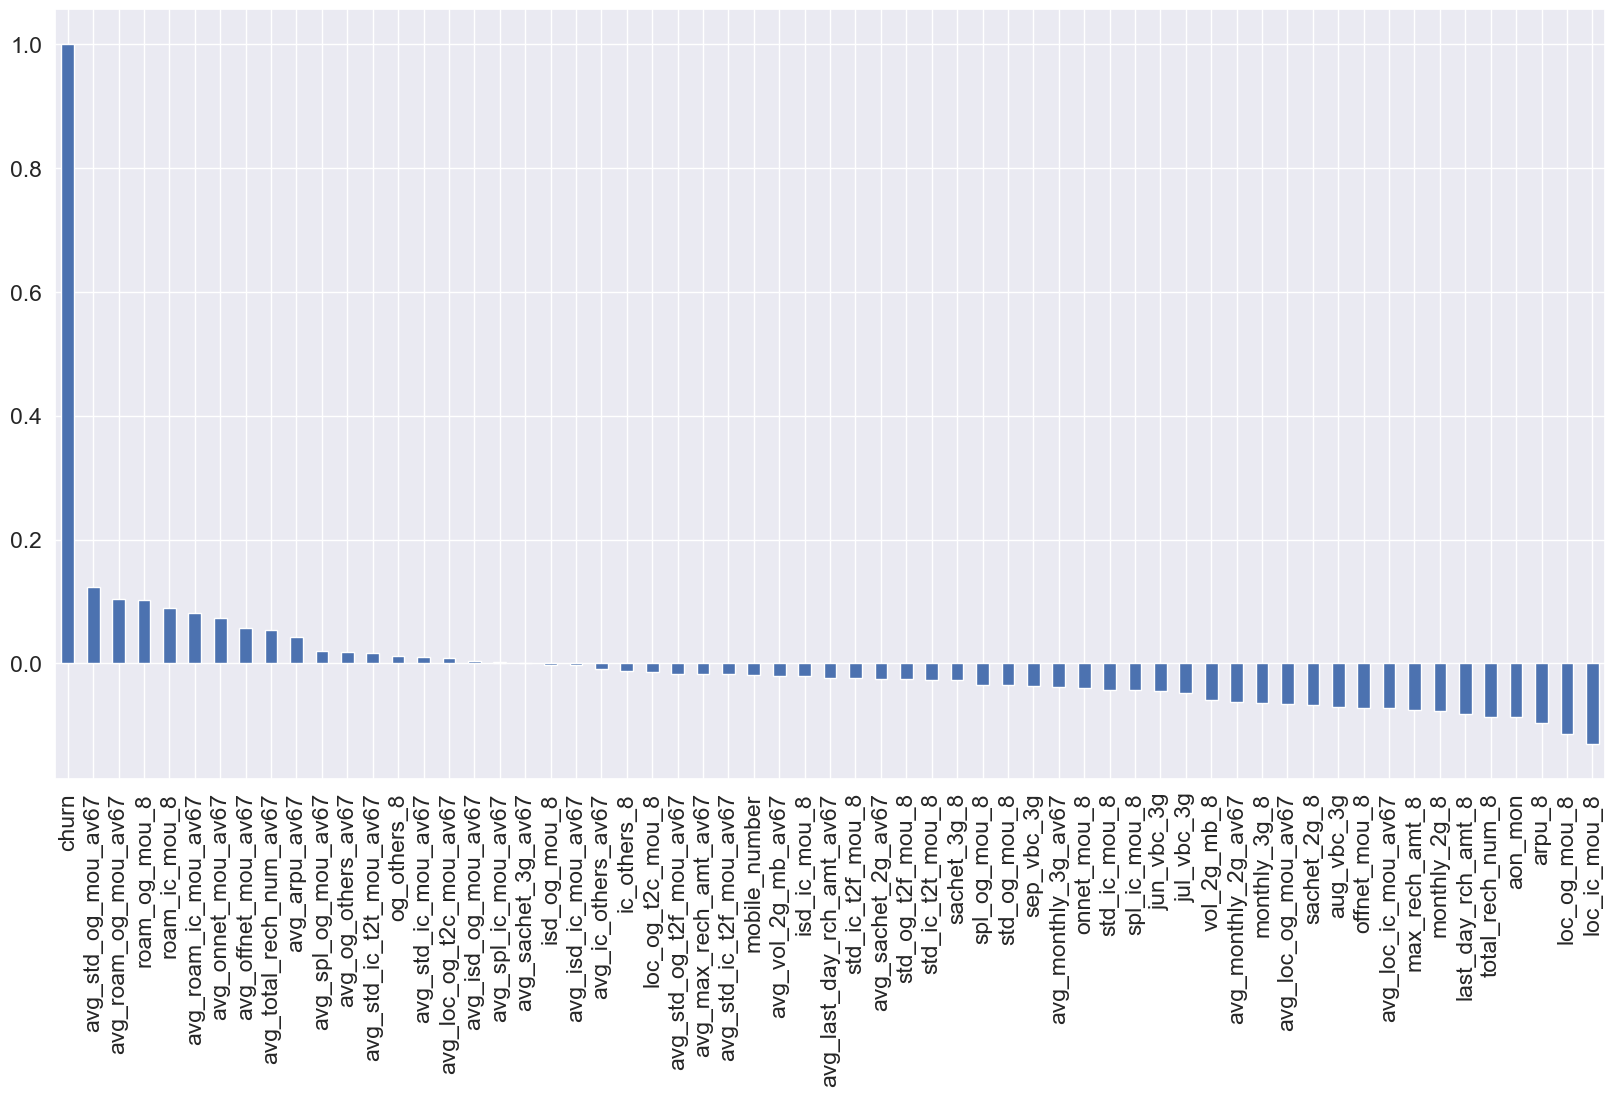

In [122]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
data_hvc.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

### observations :
#### 1. Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
#### 2. Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

## Lets Create New DF for Model Building

In [123]:
new_df = data_hvc[:].copy()

#Dropping tenure_range since we have AON MONTH already and columns are highly coorelated
new_df.drop('tenure_range', axis=1, inplace=True)
new_df.drop('mobile_number', axis=1, inplace=True)

#Since All The Values are realted to Price/ Cost/ Amount, Filling NaN with 0

new_df.fillna(0, inplace=True)

new_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,19.38,18.74,0.0,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,910.65,122.16,0.0,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0.00,0.00,0.0,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,51.86,0.00,0.0,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,20.133333
33,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,358.10,2706.83,1714.67,0.0,0,1669.9265,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.0,2.180,1.455,0.595,4.420,0.000,0.000,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,44.266667


In [124]:
X = new_df.drop(['churn'], axis=1)
y = new_df['churn']

new_df.drop('churn', axis=1, inplace=True)

In [128]:
# Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)


In [134]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)



X_train Shape :  (19952, 59)
X_test Shape :  (8552, 59)


In [133]:
y_train.value_counts(normalize=True)

0    0.943915
1    0.056085
Name: churn, dtype: float64

In [135]:
y_test.value_counts(normalize=True)

0    0.944224
1    0.055776
Name: churn, dtype: float64

In [146]:
# As discussed earlier, given dataset is skewed, lets balance the dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [148]:
print("Dimension of X_tr Shape:", X_tr.shape)
print("Dimension of y_tr Shape:", y_tr.shape)

print("Imbalance in Training dataset:",(y_tr != 0).sum()/(y_tr == 0).sum())

Dimension of X_tr Shape: (37666, 59)
Dimension of y_tr Shape: (37666,)
Imbalance in Training dataset: 1.0


In [149]:
y_tr.value_counts(normalize=True)

0    0.5
1    0.5
Name: churn, dtype: float64

# Model Building

## Support Vecor Machine (SVM)

In [150]:
# SVM (lets start with linear SVM)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear')
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)


0.9419400105244694

In [154]:
print('Linear SVM Accuracy:', metrics.accuracy_score(y_test, preds))


Linear SVM Accuracy: 0.9419400105244694


### Feature Selection uisng RFE

In [158]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# lets RFE select 15 most imp features for us
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_tr, y_tr)

In [160]:
rfe_features = list(new_df.columns[rfe.support_])
print("15 most important features selected by RFE ", rfe_features)

15 most important features selected by RFE  ['loc_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'avg_loc_og_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_t2t_mou_av67']


##   Logisctic Regression model on the seleted columns by RFE

In [161]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [163]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.rfe=lr.fit(X_rfe, y_rfe)

In [165]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('RFE Logistic Regression Accuracy :',lr.score(X_test_rfe, y_test))

[[4128 1242]
 [  60  271]]
RFE Logistic Regression Accuracy : 0.7716190142080337


In [167]:
# Substituting the value of true positive
TP = confusion_matrix[1,1]
# Substituting the value of true negatives
TN = confusion_matrix[0,0]
# Substituting the value of false positives
FP = confusion_matrix[0,1] 
# Substituting the value of false negatives
FN = confusion_matrix[1,0]

# Calculating the sensitivity
sens_log_lr_RFE=TP/(TP+FN)

# Calculating the specificity
spec_log_lr_RFE=TN/(TN+FP)

print("Sensitivity:" ,sens_log_lr_RFE)
print("Specificity:" ,spec_log_lr_RFE)

Sensitivity: 0.8187311178247734
Specificity: 0.7687150837988826


Conclusion: Logistic Regression With RFE features

Model Accuracy :  77% 
Sensitivity: 81.9%
Specificity:76.9%

Confusion matix shows high false positive rate as sensitivity is high, which is not good, lets try PCA now.

## PCA

In [209]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37666, 59)
(37666,)


In [210]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# apply PCA on train data
pca.fit(X_tr)

PCA(random_state=100)

In [211]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(37666, 59)
(8552, 59)


In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [214]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

[[6510 1565]
 [  92  385]]
Accuracy of the logistic regression model with PCA:  0.806244153414406


In [217]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('PCA Accuracy :',lr_pca.score(X_test_pca, y_test))

[[6510 1565]
 [  92  385]]
PCA Accuracy : 0.806244153414406


In [218]:

# Substituting the value of true positive
TP = confusion_matrix[1,1]
# Substituting the value of true negatives
TN = confusion_matrix[0,0]
# Substituting the value of false positives
FP = confusion_matrix[0,1] 
# Substituting the value of false negatives
FN = confusion_matrix[1,0]

# Calculating the sensitivity
sens=TP/(TP+FN)

# Calculating the specificity
spec=TN/(TN+FP)

print("Sensitivity:" ,sens)
print("Specificity:" ,spec)

Sensitivity: 0.8071278825995807
Specificity: 0.8061919504643963


Conclusion: PCA Model

Model Accuracy :  80.62%

Sensitivity: 80.71%

Specificity:80.62%

In [175]:
col = list(new_df.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.154386,0.269294,0.152856,arpu_8
1,0.057331,0.228663,-0.081392,onnet_mou_8
2,0.096865,0.241548,0.016557,offnet_mou_8
3,0.448978,-0.171343,-0.068076,roam_ic_mou_8
4,0.375246,-0.070391,-0.077035,roam_og_mou_8
5,0.011925,0.070940,-0.034114,loc_og_t2c_mou_8
6,0.019772,0.154657,0.157478,loc_og_mou_8
7,0.021904,0.033220,0.076982,std_og_t2f_mou_8
8,0.040406,0.273023,-0.134497,std_og_mou_8
9,0.038105,0.093654,0.086640,isd_og_mou_8


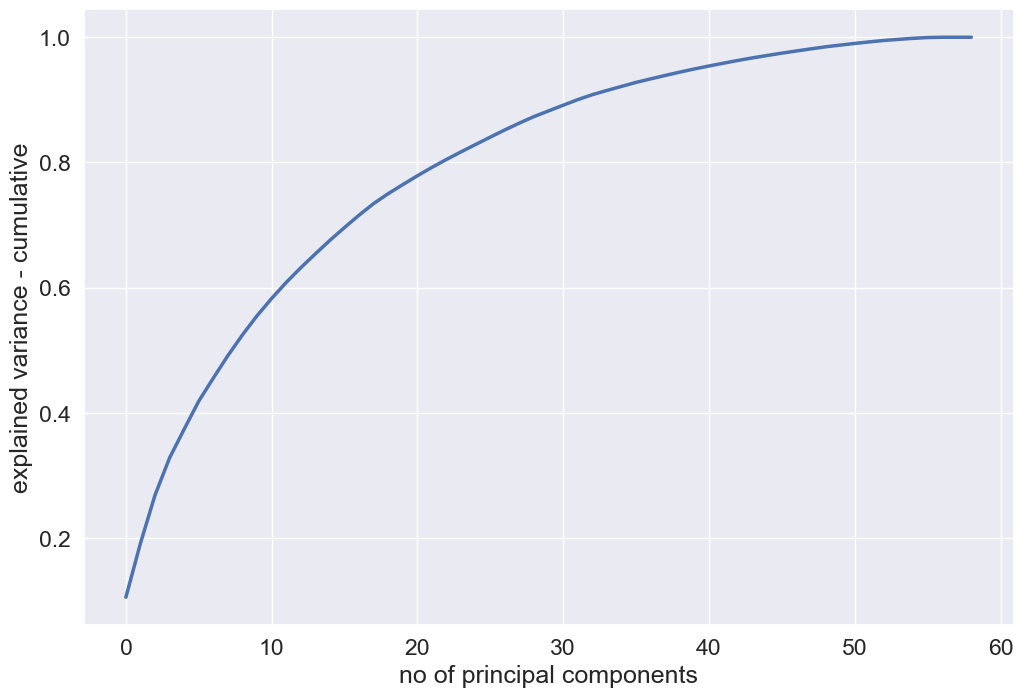

In [219]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [177]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# 33 columns explains 90% of the variance, lets apply PCA with 33 components

array([11.29, 19.83, 27.48, 32.45, 37.13, 41.55, 45.26, 48.88, 52.23,
       55.19, 57.95, 60.52, 63.01, 65.3 , 67.48, 69.57, 71.57, 73.44,
       75.  , 76.44, 77.85, 79.19, 80.45, 81.67, 82.86, 84.02, 85.16,
       86.26, 87.29, 88.19, 89.09, 89.97, 90.76, 91.43, 92.1 , 92.75,
       93.31, 93.86, 94.4 , 94.93, 95.38, 95.83, 96.27, 96.68, 97.06,
       97.43, 97.78, 98.11, 98.43, 98.7 , 98.97, 99.22, 99.45, 99.63,
       99.8 , 99.93, 99.98, 99.98, 99.98])

In [220]:
# PCA with 33 components
pca_33 = PCA(n_components=33)

df_tr_pca_33 = pca_33.fit_transform(X_tr)
print(df_tr_pca_33.shape)

df_test_pca_33 = pca_33.transform(X_test)
print(df_test_pca_33.shape)

(37666, 33)
(8552, 33)


In [221]:
#Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_33, y_tr)

# Predicted probabilities
y_pred33 = lr_pca1.predict(df_test_pca_33)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred33)

print("Accuracy with 33 PCAs: ",accuracy_score(y_test,y_pred33))

Accuracy with 33 PCAs:  0.8003975678203928


In [227]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred33)
print(confusion_matrix)
print('PCA Accuracy :',lr_pca1.score(df_test_pca_33, y_test))

[[6471 1604]
 [ 103  374]]
PCA Accuracy : 0.8003975678203928


In [228]:


# Substituting the value of true positive
TP = confusion_matrix[1,1]
# Substituting the value of true negatives
TN = confusion_matrix[0,0]
# Substituting the value of false positives
FP = confusion_matrix[0,1] 
# Substituting the value of false negatives
FN = confusion_matrix[1,0]

# Calculating the sensitivity
sens=TP/(TP+FN)

# Calculating the specificity
spec=TN/(TN+FP)

print("Sensitivity:" ,sens)
print("Specificity:" ,spec)

Sensitivity: 0.7840670859538784
Specificity: 0.8013622291021671


Conclusion: PCA with Optimum features 33

Model Accuracy :  80%

Sensitivity: 78.40%

Specificity:80.13%

# Decision Tree

In [181]:
# lets create a decision tree now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to tackle class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37666, 59)
(37666,)


In [182]:
# feature selection using lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_tr)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(37666, 30)
[ 0  1  4  6  8 10 12 15 16 19 21 22 23 24 25 26 27 30 31 32 34 35 39 43
 46 50 51 53 54 58]


In [184]:
# feature vector for decision tree
lasso_features = list(new_df.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['arpu_8', 'onnet_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aug_vbc_3g', 'sep_vbc_3g', 'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_mou_av67', 'avg_total_rech_num_av67', 'avg_max_rech_amt_av67', 'avg_vol_2g_mb_av67', 'avg_monthly_2g_av67', 'aon_mon']


In [185]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5)

In [186]:
# lets see the classification report of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8075
           1       0.24      0.71      0.36       477

    accuracy                           0.86      8552
   macro avg       0.61      0.79      0.64      8552
weighted avg       0.94      0.86      0.89      8552



In [229]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)
print("Desicion Tree Accuracy: ", accuracy_score(y_test,y_pred1))

[[6999 1076]
 [ 140  337]]
Desicion Tree Accuracy:  0.8578110383536015


In [230]:
# Substituting the value of true positive
TP = confusion_matrix[1,1]
# Substituting the value of true negatives
TN = confusion_matrix[0,0]
# Substituting the value of false positives
FP = confusion_matrix[0,1] 
# Substituting the value of false negatives
FN = confusion_matrix[1,0]

# Calculating the sensitivity
sens=TP/(TP+FN)

# Calculating the specificity
spec=TN/(TN+FP)

print("Sensitivity:" ,sens)
print("Specificity:" ,spec)

Sensitivity: 0.7064989517819706
Specificity: 0.866749226006192


Conclusion: Desicion Tree 

Model Accuracy :  85.78%

Sensitivity: 70.64%

Specificity: 86.67%

## Fine tune hyperparameters

In [188]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [189]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.137198,0.032048,0.003411,0.000491,1,{'max_depth': 1},0.770905,0.800478,0.806452,0.799018,0.796628,0.794696,0.012329,39,0.800644,0.793250,0.791757,0.793615,0.794212,0.794696,0.003083
1,0.200009,0.003630,0.003007,0.000013,2,{'max_depth': 2},0.807805,0.821851,0.829815,0.822647,0.824107,0.821245,0.007275,38,0.827393,0.820728,0.823184,0.820529,0.823383,0.823043,0.002479
2,0.372526,0.083516,0.008199,0.009907,3,{'max_depth': 3},0.812185,0.845347,0.846276,0.846542,0.845214,0.839113,0.013474,37,0.841132,0.844523,0.839279,0.844025,0.844025,0.842597,0.002046
3,0.404804,0.016950,0.004399,0.001357,4,{'max_depth': 4},0.830502,0.855569,0.851719,0.859020,0.857826,0.850927,0.010511,36,0.854839,0.858195,0.851492,0.856602,0.857034,0.855632,0.002334
4,0.488404,0.039293,0.004008,0.002526,5,{'max_depth': 5},0.842580,0.867915,0.871897,0.861543,0.870835,0.862954,0.010805,35,0.868014,0.871138,0.865463,0.867653,0.870541,0.868562,0.002063


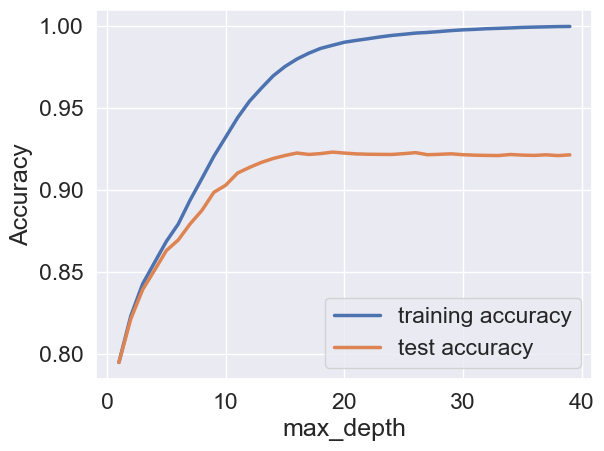

In [190]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"],
         score["mean_train_score"],
         label="training accuracy")
plt.plot(score["param_max_depth"],
         score["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



Conclusion:  max_depth =12 seems to be the optimal one

In [191]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [192]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.519575,0.124044,0.004777,0.001463,5,{'min_samples_leaf': 5},0.881603,0.917430,0.921943,0.919952,0.924067,0.912999,0.015850,1,0.971260,0.966714,0.966482,0.966980,0.965320,0.967351,0.002035
1,1.155563,0.022633,0.004998,0.002097,25,{'min_samples_leaf': 25},0.864481,0.902164,0.909598,0.906279,0.907872,0.898079,0.016978,2,0.925528,0.920220,0.922278,0.921647,0.919026,0.921740,0.002206
2,1.166451,0.124547,0.003804,0.000747,45,{'min_samples_leaf': 45},0.856783,0.890349,0.899243,0.889951,0.895526,0.886370,0.015190,3,0.913248,0.903561,0.902532,0.904025,0.903760,0.905425,0.003944
3,0.959716,0.035964,0.003402,0.000489,65,{'min_samples_leaf': 65},0.853199,0.885305,0.889553,0.887960,0.889685,0.881140,0.014060,4,0.903027,0.896061,0.893074,0.892145,0.893738,0.895609,0.003928
4,0.945315,0.048447,0.003999,0.001101,85,{'min_samples_leaf': 85},0.851341,0.880260,0.889685,0.884906,0.882915,0.877822,0.013595,5,0.893601,0.889921,0.885607,0.887067,0.885043,0.888248,0.003165


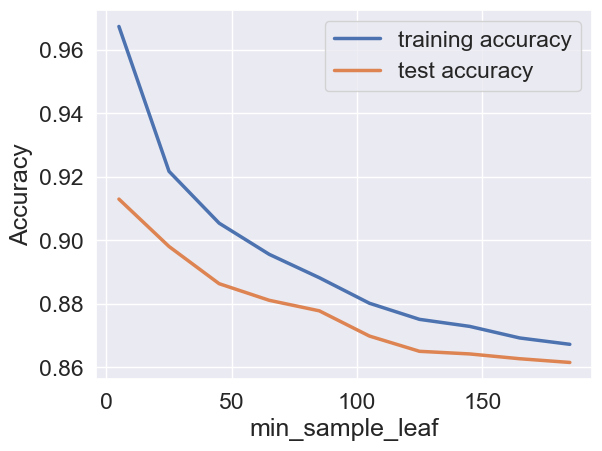

In [193]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"],
         score["mean_train_score"],
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"],
         score["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Conclusion: min_sample_leaf =25 seems to be the optimal one

In [194]:
# lets fine tune min sample split now
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [195]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.789358,0.178154,0.004802,0.001164,5,{'min_samples_split': 5},0.889567,0.923404,0.927386,0.924598,0.926590,0.918309,0.014440,1,0.995254,0.993595,0.993197,0.993827,0.994591,0.994093,0.000737
1,1.603528,0.211088,0.004802,0.002134,25,{'min_samples_split': 25},0.872179,0.918226,0.917563,0.916368,0.916368,0.908141,0.017995,2,0.967344,0.965520,0.965221,0.963495,0.962699,0.964856,0.001629
2,1.510412,0.079249,0.004005,0.000005,45,{'min_samples_split': 45},0.863817,0.910129,0.912917,0.908138,0.908934,0.900787,0.018556,3,0.950717,0.946703,0.945940,0.947168,0.946504,0.947406,0.001702
3,1.535811,0.119124,0.004005,0.000633,65,{'min_samples_split': 65},0.859968,0.907872,0.906279,0.904022,0.907739,0.897176,0.018656,4,0.941225,0.938738,0.933296,0.935221,0.936979,0.937092,0.002747
4,1.620377,0.153511,0.008596,0.008713,85,{'min_samples_split': 85},0.861561,0.902960,0.905615,0.899774,0.907076,0.895397,0.017100,5,0.934555,0.931205,0.927455,0.926194,0.929546,0.929791,0.002938


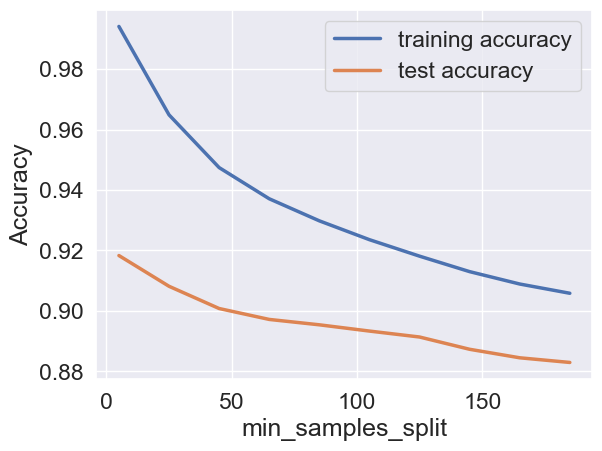

In [196]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Conclusion: min_samples_leaf=50 seems to be optimal

In [235]:
# Create the parameter grid
param_grid = {
    'max_depth': range(4, 14, 2),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(4, 14, 2),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [236]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.896193723107223


# Desicion Tree model with optimal hyperparameters

In [237]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=25, min_samples_split=50)


In [240]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=12,
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_tr, y_tr)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [241]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8808465855940131


In [242]:
y_pred = clf_gini.predict(X_test)

In [243]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('DT Hyperparameter  Accuracy :',clf_gini.score(X_test, y_test))

[[7223  852]
 [ 167  310]]
DT Hyperparameter  Accuracy : 0.8808465855940131


In [244]:


# Substituting the value of true positive
TP = confusion_matrix[1,1]
# Substituting the value of true negatives
TN = confusion_matrix[0,0]
# Substituting the value of false positives
FP = confusion_matrix[0,1] 
# Substituting the value of false negatives
FN = confusion_matrix[1,0]

# Calculating the sensitivity
sens=TP/(TP+FN)

# Calculating the specificity
spec=TN/(TN+FP)

print("Sensitivity:" ,sens)
print("Specificity:" ,spec)

Sensitivity: 0.649895178197065
Specificity: 0.8944891640866873



Conclusion: DT with hyperparameter tuning

Model Accuracy :  88.08%
    
Sensitivity: 65%
    
Specificity:89.44%

# Random Forest

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_tr, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test)

print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9409494855004678


In [248]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8075
           1       0.47      0.53      0.50       477

    accuracy                           0.94      8552
   macro avg       0.72      0.75      0.73      8552
weighted avg       0.94      0.94      0.94      8552



In [250]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction_test)
print(confusion_matrix)
print('Random Forest  Accuracy :',metrics.accuracy_score(y_test, prediction_test))


[[7796  279]
 [ 226  251]]
Random Forest  Accuracy : 0.9409494855004678


In [251]:
# Substituting the value of true positive
TP = confusion_matrix[1,1]
# Substituting the value of true negatives
TN = confusion_matrix[0,0]
# Substituting the value of false positives
FP = confusion_matrix[0,1] 
# Substituting the value of false negatives
FN = confusion_matrix[1,0]

# Calculating the sensitivity
sens=TP/(TP+FN)

# Calculating the specificity
spec=TN/(TN+FP)

print("Sensitivity:" ,sens)
print("Specificity:" ,spec)

Sensitivity: 0.5262054507337526
Specificity: 0.9654489164086687


Conclusion: Ramdom Forest

Model Accuracy :  94.09%

Sensitivity: 52.62%

Specificity:96.54%

## Ramdon forest with Hypertuning


In [253]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 2)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 2)}, return_train_score=True,
             scoring='accuracy')

In [254]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.653859,0.194158,0.083793,0.011618,2,{'max_depth': 2},0.824131,0.848931,0.842161,0.852383,0.843223,0.842166,0.009763,9,0.852283,0.846447,0.834567,0.844523,0.837885,0.843141,0.006286
1,6.437774,0.057128,0.093639,0.010598,4,{'max_depth': 4},0.842846,0.866322,0.871100,0.868446,0.867782,0.863299,0.010343,8,0.869939,0.865231,0.864434,0.864866,0.864268,0.865748,0.002122
2,10.252709,1.529903,0.107799,0.006040,6,{'max_depth': 6},0.857579,0.886632,0.891278,0.885172,0.884508,0.881034,0.011963,7,0.890781,0.887598,0.884711,0.885143,0.882488,0.886144,0.002830
3,12.350280,0.376138,0.120999,0.003955,8,{'max_depth': 8},0.883063,0.907739,0.913182,0.910660,0.909200,0.904769,0.011001,6,0.920649,0.916968,0.914180,0.915375,0.913318,0.916098,0.002585
4,18.703433,3.211040,0.152194,0.007631,10,{'max_depth': 10},0.906159,0.928581,0.934953,0.931767,0.930838,0.926459,0.010355,5,0.951547,0.945608,0.944114,0.944811,0.945906,0.946397,0.002650


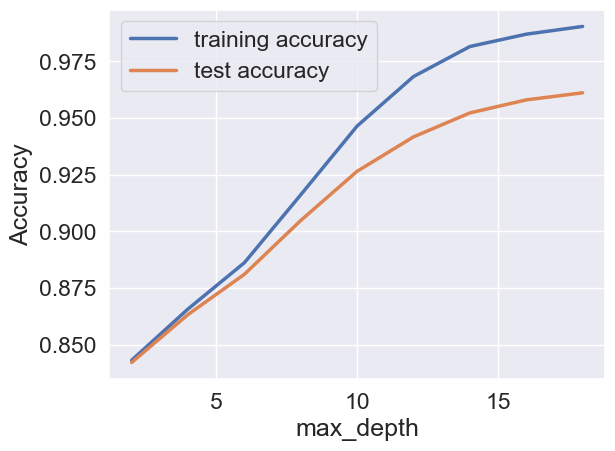

In [255]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Conclusion : Max Depth is 15

In [256]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5
#
## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
#
#
## fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

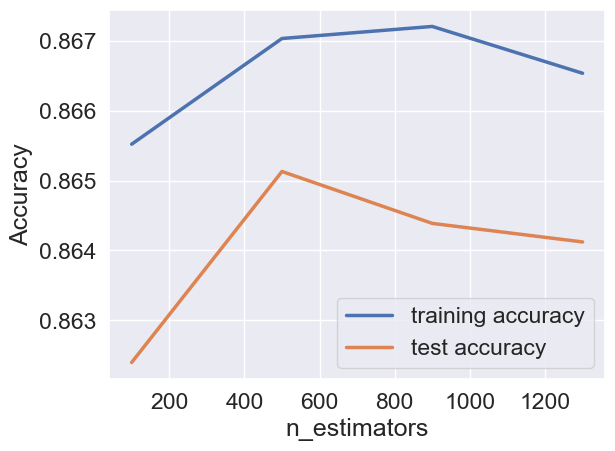

In [257]:
## scores of GridSearch CV
scores = rf.cv_results_
#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [258]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 10)},
             return_train_score=True, scoring='accuracy')

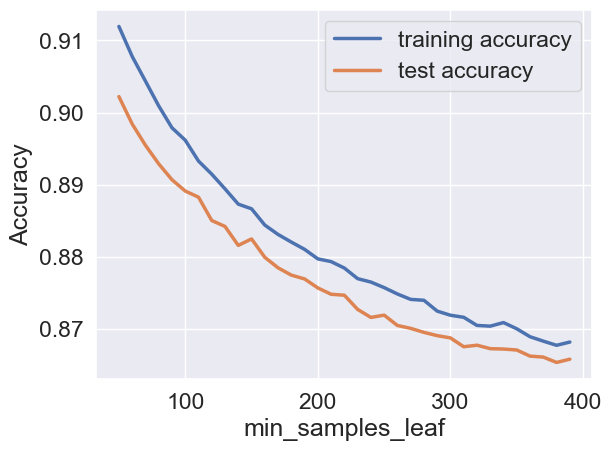

In [259]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [260]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(100, 500, 25)},
             return_train_score=True, scoring='accuracy')

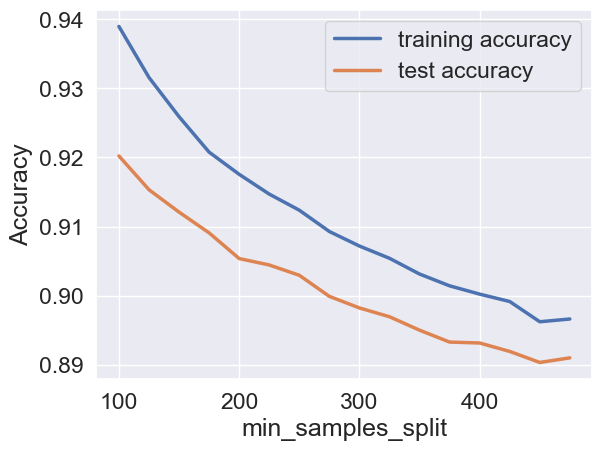

In [261]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [262]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700],
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# fit the grid search with the data
grid_search.fit(X_lasso, y_tr)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [265]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5399
           1       0.67      0.19      0.29       302

    accuracy                           0.95      5701
   macro avg       0.81      0.59      0.63      5701
weighted avg       0.94      0.95      0.94      5701

[[5371   28]
 [ 245   57]]


In [267]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction_test)
print(confusion_matrix)
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

[[5371   28]
 [ 245   57]]
Accuracy Score for Random Forest Final Model : 0.9521136642694265


In [268]:
# Substituting the value of true positive
TP = confusion_matrix[1,1]
# Substituting the value of true negatives
TN = confusion_matrix[0,0]
# Substituting the value of false positives
FP = confusion_matrix[0,1] 
# Substituting the value of false negatives
FN = confusion_matrix[1,0]

# Calculating the sensitivity
sens=TP/(TP+FN)

# Calculating the specificity
spec=TN/(TN+FP)

print("Sensitivity:" ,sens)
print("Specificity:" ,spec)

Sensitivity: 0.18874172185430463
Specificity: 0.9948138544174847


Conclusion: 
Model Accuracy :  95.21%
Sensitivity: 18.87%
Specificity:99.48%

<Axes: >

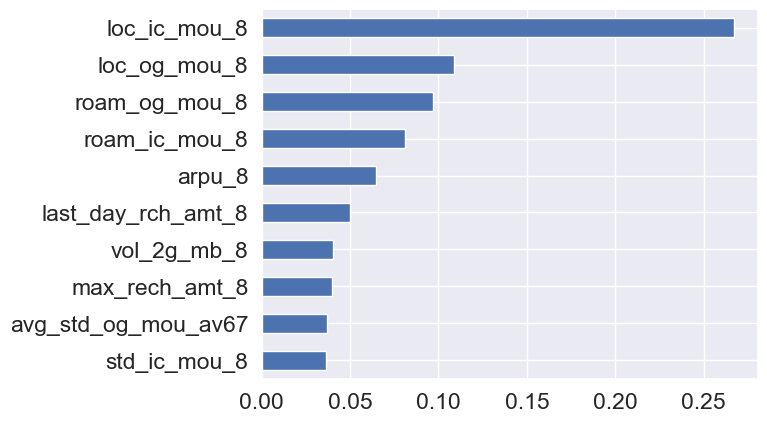

In [270]:
# list of important features
X = new_df
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## Conclusions from Random Forest
### Local Incoming & Outgoing  for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.

# Overall Conclusions

1. Very Less Amount of High Value customers are churning which is a good service indicator
2. Large no of Customers are new to Telecom Company and fall under < 5 Yr Tenure
3. Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn
4. People with less than 4 Yrs of Tenure are more likely to Churn
5. Behaviour of Volume Based Cost is not a strong indicator of Churn
6. Max Recharge Amount could be a good Churn Indicator
7. Random Forest is the best method to Predict Churn followed by SVM, other models too do a fair job
8. Behaviour is 8 Month can be the base of Churn Analysis
9. Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th Month are strong indicators of Churn Behaviour